In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your zipped dataset in Google Drive
zip_path = '/content/drive/MyDrive/image_dataset.zip'
extract_path = '/content/your_dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
os.listdir(extract_path)


Mounted at /content/drive


['new plant diseases dataset(augmented)',
 'New Plant Diseases Dataset(Augmented)',
 'test']

import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


1,2.Dataset Preparation and Preprocessing the Dataset

In [3]:
# Define paths for training, validation, and test data
train_dir = '/content/your_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/your_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/content/your_dataset/test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


3.Model Architecture

In [4]:
# @title Default title text
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,415,590 (169.43 MB)

 Trainable params: 44,415,590 (169.43 MB)

 Non-trainable params: 0 (0.00 B)

4.Compile the Model

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


5.Train the Model

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=7,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/model_checkpoint.keras', save_best_only=True)]
)


Epoch 1/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 967s 439ms/step - accuracy: 0.7637 - loss: 0.7445 - val_accuracy: 0.8432 - val_loss: 0.4891
Epoch 2/7
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 2:32 70ms/step - accuracy: 0.8125 - loss: 0.6179

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8125 - loss: 0.6179 - val_accuracy: 1.0000 - val_loss: 0.1891
Epoch 3/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 968s 435ms/step - accuracy: 0.8500 - loss: 0.4602 - val_accuracy: 0.8467 - val_loss: 0.5256
Epoch 4/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9375 - loss: 0.3893 - val_accuracy: 0.7500 - val_loss: 1.1036
Epoch 5/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 951s 432ms/step - accuracy: 0.8864 - loss: 0.3523 - val_accuracy: 0.9060 - val_loss: 0.2872
Epoch 6/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9062 - loss: 0.2396 - val_accuracy: 0.7500 - val_loss: 0.5308
Epoch 7/7
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 980s 435ms/step - accuracy: 0.9047 - loss: 0.2935 - val_accuracy: 0.8876 - val_loss: 0.3579


6.Evaluate the Model

Loss and Accuracy Plots

Final Training Accuracy: 90.46%
Final Validation Accuracy: 88.76%


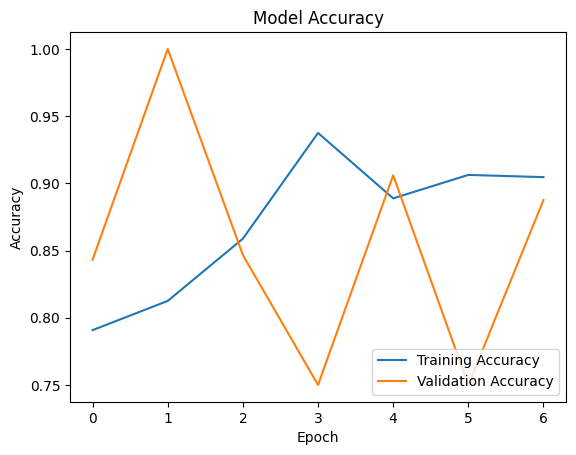

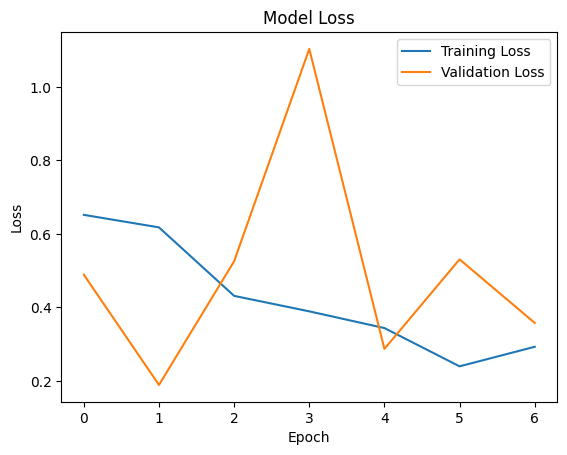

In [21]:



# Final Training and Validation Accuracy
print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")


# Plotting loss and accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


7.Deploy a Predictive System

Preprocess Input Data

In [9]:
from tensorflow.keras.preprocessing import image

def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


Make Predictions

In [10]:
def predict_class(img_path, model, class_labels):
    img_array = preprocess_input_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]
    confidence = np.max(prediction)*100
    return predicted_class, confidence


Test the Predictive System

In [19]:
# Load the saved model and class labels
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/final_model.h5')

with open('/content/class_labels.json', 'r') as f:
    class_labels = json.load(f)

# Test on a sample image
sample_image_path = '/content/your_dataset/test/test/TomatoYellowCurlVirus2.JPG'
predicted_class, confidence = predict_class(sample_image_path, loaded_model, class_labels)

print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")

sample_image_path_2 = '/content/your_dataset/test/test/PotatoEarlyBlight1.JPG'
predicted_class, confidence = predict_class(sample_image_path_2, loaded_model, class_labels)

print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")

sample_image_path_3 = '/content/your_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Grape___Esca_(Black_Measles)/011f307f-e06b-4604-9419-d940f7b00290___FAM_B.Msls 1096.JPG'
predicted_class, confidence = predict_class(sample_image_path_3, loaded_model, class_labels)

print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 99.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Potato___Early_blight, Confidence: 99.79%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: Grape___Esca_(Black_Measles), Confidence: 100.00%


8.Save the Model

In [14]:
# Save the trained model
model.save('/content/final_model.h5')

# Save the class labels
class_labels = train_generator.class_indices
import json
with open('/content/class_labels.json', 'w') as f:
    json.dump(class_labels, f)


In [20]:
final_model_path = '/content/drive/MyDrive/final_model.h5'
model.save(final_model_path)
# Save the class labels to Google Drive
class_labels = train_generator.class_indices
class_labels_path = '/content/drive/MyDrive/class_labels.json'
with open(class_labels_path, 'w') as f:
    json.dump(class_labels, f)
checkpoint_path = '/content/drive/MyDrive/model_checkpoint.keras'
model.save(checkpoint_path)